In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# Load data

In [3]:
# Download Data
interval = '1d'
start = '2023-1-1'
end = '2024-1-1'

google = yf.Ticker('BTC-USD')
google_df = google.history(interval='1d',start=start,end=end)

# 1 Timeline (Historical data)

In [4]:
# Final payoff
1 + (google_df['Close'][-1] - google_df['Close'][0]) / google_df['Close'][0]

2.5541741941225533

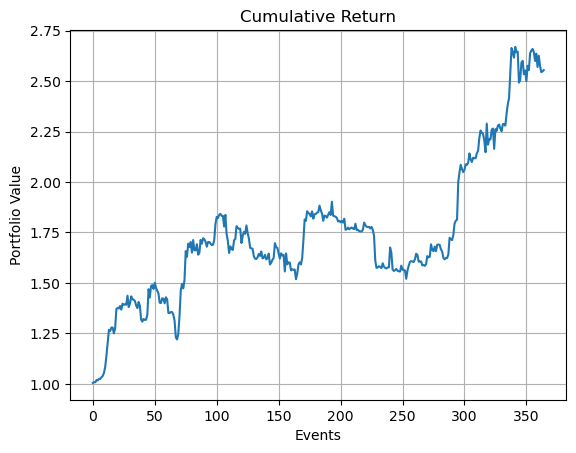

In [5]:
# Make the log return events 
google_ret = np.log(google_df['Close']).diff(periods=1).dropna().values

google_portfolio = np.cumsum(google_ret)

plt.xlabel('Events')
plt.ylabel('Portfolio Value')
plt.title('Cumulative Return')
plt.grid(True)
plt.plot(np.exp(google_portfolio));

In [6]:
np.exp(google_portfolio)[-1] 

2.554174194122556

# Parallel World with GBM

In [7]:
# Parallel timeline with human assumtion
mu = google_ret.mean() # mean of drift
sigma = google_ret.std() # volatility of drifting
x0 = 1 # initial value
n = len(google_ret)  # Number of trading days for 1 year
dt = 1 # step size is 1 day
m = 100000 # number of paths

dW = np.random.normal(0, 1, size=(m, n)) * np.sqrt(dt) 
drift = (mu - (sigma ** 2) / 2) * dt
diffusion = sigma * dW

# make the parallel timelines
x = np.exp(drift + diffusion)
google_portfolios = x0 * np.cumprod(x, axis=1)

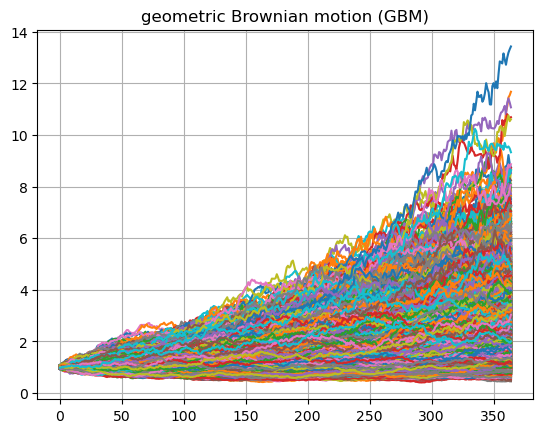

In [8]:
# plot for the first 10000 samples
for s in google_portfolios[:10000]:       
    plt.plot(s)
plt.grid(True)
plt.title('geometric Brownian motion (GBM)')
plt.show()

In [9]:
final_google_portfolios = google_portfolios[:, -1]

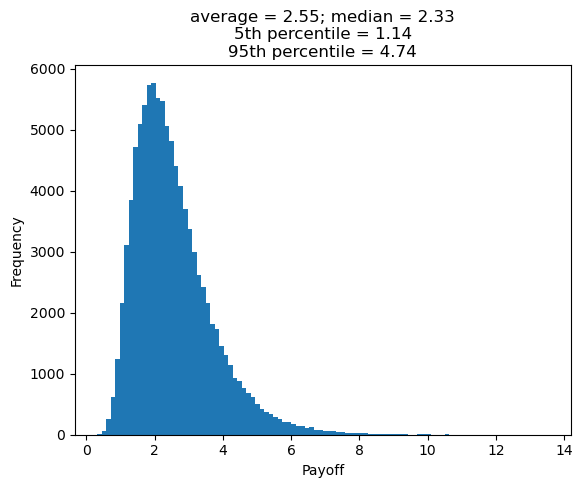

In [10]:
med = np.median(final_google_portfolios)
avg = np.average(final_google_portfolios)
per_5 = np.percentile(np.sort(final_google_portfolios), 5)
per_95 = np.percentile(np.sort(final_google_portfolios), 95)
plt.title(f'average = {avg:.2f}; median = {med:.2f}\n5th percentile = {per_5:.2f}\n95th percentile = {per_95:.2f}')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.hist(final_google_portfolios, 100);

# Rearranging the log returns

## Rearrange without replacement

In [11]:
rearrange_return_without_replacement = np.random.choice(google_ret, size=len(google_ret), replace=False)

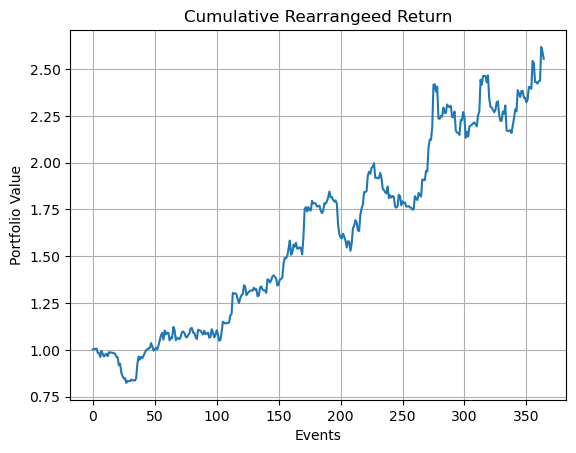

In [12]:
google_portfolio = np.cumsum(rearrange_return_without_replacement)

plt.xlabel('Events')
plt.ylabel('Portfolio Value')
plt.title('Cumulative Rearrangeed Return')
plt.grid(True)
plt.plot(np.exp(google_portfolio));

In [13]:
# Final Payoff of rearranged return without replacement
np.exp(google_portfolio)[-1] 

2.554174194122556

## Rearrange with replacement

In [14]:
rearrange_return_with_replacement = np.random.choice(google_ret, size=len(google_ret), replace=True)

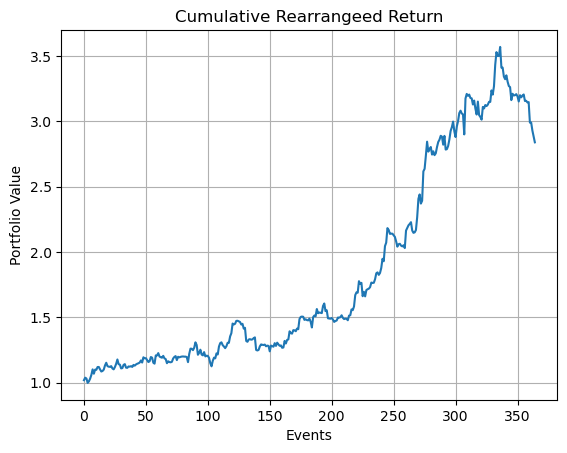

In [15]:
google_portfolio = np.cumsum(rearrange_return_with_replacement)

plt.xlabel('Events')
plt.ylabel('Portfolio Value')
plt.title('Cumulative Rearrangeed Return')
plt.grid(True)
plt.plot(np.exp(google_portfolio));

In [16]:
# Final Payoff of rearranged return with replacement
np.exp(google_portfolio)[-1] 

2.8393527312922644

## Parllel Worlds with Bootstrapping

In [17]:
m = 100000 # number of paths
rearrange_return = np.random.choice(google_ret, size= (m, len(google_ret)), replace=True)
google_portfolios = np.exp(np.cumsum(rearrange_return, axis=1))

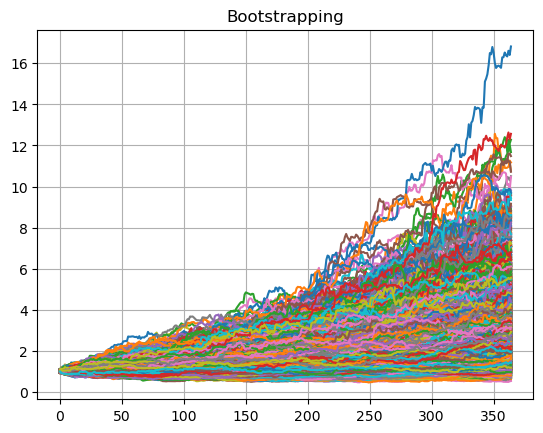

In [18]:
# plot for the first 10000 samples
for s in google_portfolios[:10000]:       
    plt.plot(s)
plt.grid(True)
plt.title('Bootstrapping')
plt.show()

In [19]:
final_google_portfolios = google_portfolios[:, -1]

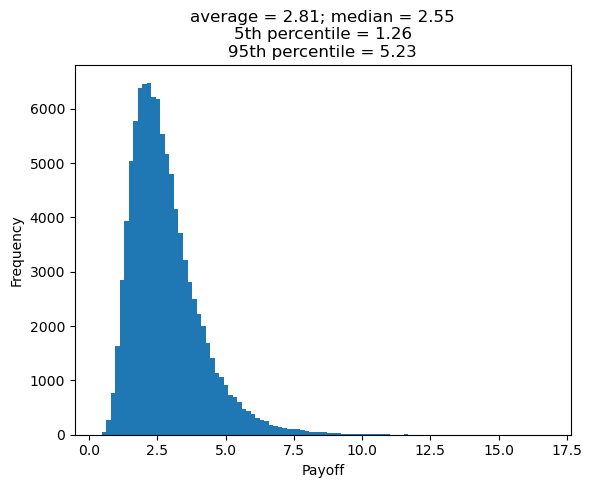

In [20]:
med = np.median(final_google_portfolios)
avg = np.average(final_google_portfolios)
per_5 = np.percentile(np.sort(final_google_portfolios), 5)
per_95 = np.percentile(np.sort(final_google_portfolios), 95)
plt.title(f'average = {avg:.2f}; median = {med:.2f}\n5th percentile = {per_5:.2f}\n95th percentile = {per_95:.2f}')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.hist(final_google_portfolios, 100);

# Combination of two chians

In [21]:
# Create a new data
gold = yf.Ticker('DOGE-USD')
gold_df = gold.history(interval='1d',start=start,end=end)

# Make the log return events 
gold_ret = np.log(gold_df['Close']).diff(periods=1).dropna().values

In [22]:
m = 100000 # number of paths
rearrange_return_gold = np.random.choice(gold_ret, size= (m, len(google_ret)), replace=True)
gold_portfolios = np.exp(np.cumsum(rearrange_return_gold, axis=1))

In [23]:
strategy_protfolios = 0.2 * gold_portfolios + 0.8 * google_portfolios

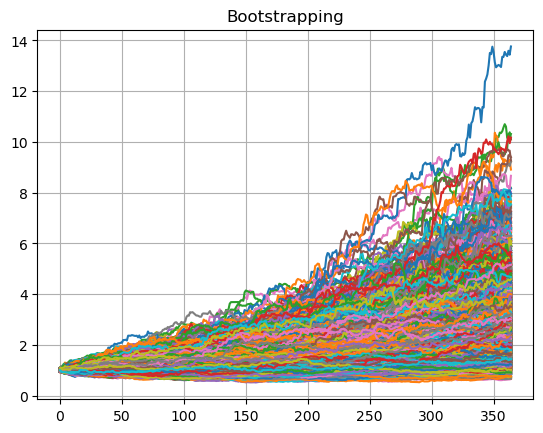

In [24]:
# plot for the first 10000 samples
for s in strategy_protfolios[:10000]:       
    plt.plot(s)
plt.grid(True)
plt.title('Bootstrapping')
plt.show()

In [25]:
final_strategy_portfolios = strategy_protfolios[:, -1]

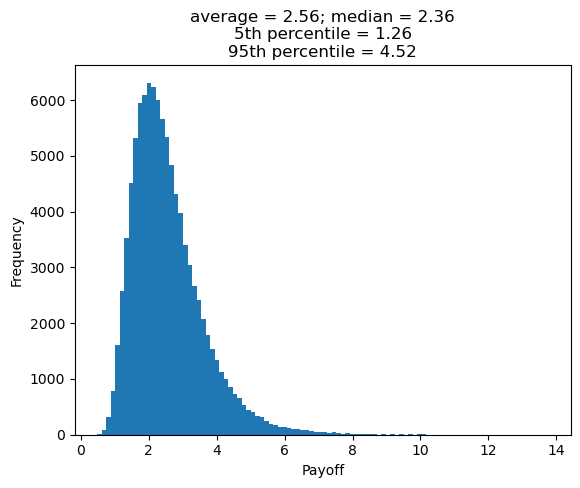

In [26]:
med = np.median(final_strategy_portfolios)
avg = np.average(final_strategy_portfolios)
per_5 = np.percentile(np.sort(final_strategy_portfolios), 5)
per_95 = np.percentile(np.sort(final_strategy_portfolios), 95)
plt.title(f'average = {avg:.2f}; median = {med:.2f}\n5th percentile = {per_5:.2f}\n95th percentile = {per_95:.2f}')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.hist(final_strategy_portfolios, 100);